In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
#Load FPKM isoform switch filtered file

FPKM_isoform_filtered_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/isoform_switch/BRCA_FPKM_protein_isoform_filtered.csv'
FPKM_isoform_filtered = pd.read_csv(FPKM_isoform_filtered_file,header=[0,1],sep='\t',index_col=[0])

In [3]:
#Create boolean for tumour and normal samples

cancer_value = FPKM_isoform_filtered[("Cancer", "Cancer")] == 1
normal_value = FPKM_isoform_filtered[("Cancer", "Cancer")] == 0

#Input corresponding boolean to create new cancer and normal dataframes

FPKM_cancer = FPKM_isoform_filtered[cancer_value]
FPKM_normal = FPKM_isoform_filtered[normal_value]

#Drop the cancer column from the cancer and normal FPKM tables
FPKM_cancer.drop('Cancer',axis=1,level=0,inplace=True)
FPKM_normal.drop('Cancer',axis=1,level=0,inplace=True)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
#Rename indexes upto patient ID so we can match samples

FPKM_cancer.rename(index= lambda x: '-'.join((x.split('-')[0:3])),inplace=True)
FPKM_normal.rename(index= lambda x: '-'.join((x.split('-')[0:3])),inplace=True)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
FPKM_normal.head()

Gene_symbol,TANK,RBCK1,CASC4,DUT,TMEM201,FBLN2,ABLIM3,MPRIP,MCF2L,EHBP1,...,ZNF207,ADAMTS12,PCGF5,REPS1,CCND3,LRRFIP2,ZRANB2,H2AFV,CEP104,SLK
Gene_ensembl_id,ENSG00000136560,ENSG00000125826,ENSG00000166734,ENSG00000128951,ENSG00000188807,ENSG00000163520,ENSG00000173210,ENSG00000133030,ENSG00000126217,ENSG00000115504,...,ENSG00000010244,ENSG00000151388,ENSG00000180628,ENSG00000135597,ENSG00000112576,ENSG00000093167,ENSG00000132485,ENSG00000105968,ENSG00000116198,ENSG00000065613
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-BH-A209,22.930802,16.079475,25.227958,11.373704,2.156518,64.112829,18.380778,14.526588,2.471352,12.015144,...,9.002241,2.783703,12.846590,4.856152,17.057126,5.243835,22.604856,24.950255,5.914953,21.257205
TCGA-BH-A0C3,27.444225,16.880432,20.097887,10.813460,3.070126,18.161184,6.054446,14.710952,2.170020,7.292306,...,11.496310,3.150432,10.457363,6.749262,14.147371,4.763933,30.543253,29.279907,5.435633,17.068105
TCGA-E9-A1RD,12.235302,12.591621,22.371711,10.737518,1.500033,209.323701,22.768124,16.365024,2.318654,17.832692,...,6.341804,3.399537,8.449189,3.125390,9.128834,4.910880,16.428800,26.969640,6.729730,16.949906
TCGA-A7-A0D9,8.741662,12.142800,16.052016,8.905150,1.088172,182.480608,21.155568,13.486026,3.277882,18.594769,...,5.791693,5.818033,5.614393,2.567617,8.568986,3.981452,10.448564,23.762584,5.548207,15.296059
TCGA-E2-A1IG,10.513008,16.869813,16.423836,8.773115,2.594976,108.083013,20.403683,16.836096,3.627853,14.835329,...,7.598403,4.343165,8.074103,3.905240,16.776204,4.553045,15.495080,24.739208,5.533829,15.285425


In [6]:
#Create list of non-matched samples

non_matched = list(set(FPKM_cancer.index) - set(FPKM_normal.index)) + list(set(FPKM_normal.index) - set(FPKM_cancer.index))

In [7]:
#Drop non_matched sample IDs / indexes from both cancer and normal FPKM tables

FPKM_cancer = FPKM_cancer.query("index not in @non_matched")
FPKM_normal = FPKM_normal.query("index not in @non_matched")

In [8]:
#Check
display(set(FPKM_cancer.index) - set(FPKM_normal.index))
set(FPKM_normal.index) - set(FPKM_cancer.index)

set()

set()

In [9]:
#Create dataframe containing the abosolute mean difference between tumour and normal FPKM values for each gene

mean_FPKM_difference_abs = abs(FPKM_cancer.mean() - FPKM_normal.mean()).to_frame(name='Mean_FPKM_difference_cancer_vs_normal')

In [10]:
#Reset the index to only include Gene_symbol
mean_FPKM_difference_abs.reset_index(level='Gene_ensembl_id',inplace=True)

In [11]:
mean_FPKM_difference_abs

,Gene_ensembl_id,Mean_FPKM_difference_cancer_vs_normal
Gene_symbol,,
TANK,ENSG00000136560,7.226624
RBCK1,ENSG00000125826,2.820608
CASC4,ENSG00000166734,2.365143
DUT,ENSG00000128951,0.836011
TMEM201,ENSG00000188807,0.125157
FBLN2,ENSG00000163520,43.555529
ABLIM3,ENSG00000173210,8.509159
MPRIP,ENSG00000133030,6.448761
MCF2L,ENSG00000126217,0.140003


In [12]:
#Get list of top genes with highest mean_FPKM_differnece via index ( = Gene_symbol symbol) 

top_genes_list = mean_FPKM_difference_abs.sort_values(by='Mean_FPKM_difference_cancer_vs_normal',ascending=False).head(5).index

#Now get index positions of these genes, using enumerate, for xtick positions

xticks = [i for i,x in enumerate (mean_FPKM_difference_abs.index) if x in top_genes_list]

In [13]:
#Create a dataframe only containing the genes with greatest FPKM mean difference
#the index of these will be used as xtick labels

top_gene_df = mean_FPKM_difference_abs[mean_FPKM_difference_abs.index.isin(top_genes_list)]


In [14]:
top_gene_df

,Gene_ensembl_id,Mean_FPKM_difference_cancer_vs_normal
Gene_symbol,,
FBLN2,ENSG00000163520,43.555529
GSN,ENSG00000148180,180.117089
INHBA,ENSG00000122641,13.585184
MYL6,ENSG00000092841,13.174994
DST,ENSG00000151914,20.580817


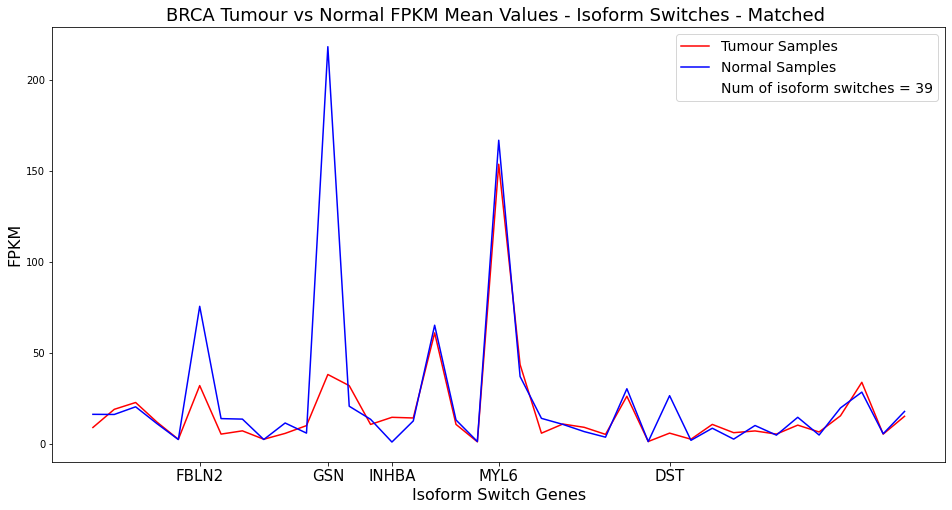

In [15]:
#Create plot showing mean FPKM values for cancer and normal samples
#X axis only labels genes with greatest FPKM difference to not overcomplicate graph visuals

ax = FPKM_cancer.mean().plot(label='Tumour',color = 'red',figsize=(16,8))
FPKM_normal.mean().plot(ax=ax,label='Normal',color = 'blue')
ax.plot([], [], ' ',label= 'Num of isoform switches = ' + str(len(FPKM_cancer.columns)))

ax.legend(['Tumour Samples','Normal Samples','Num of isoform switches = ' + str(len(FPKM_cancer.columns))],fontsize=14)
ax.set_xlabel('Isoform Switch Genes',fontsize=16)
ax.set_xticks(xticks)
ax.set_xticklabels(top_gene_df.index,fontsize=15)
ax.set_ylabel('FPKM',fontsize=16)
ax.set_title(FPKM_isoform_filtered_file.split('/')[5] + ' Tumour vs Normal FPKM Mean Values - Isoform Switches - Matched ',fontsize=18)

ax.figure.savefig(FPKM_isoform_filtered_file.split('/')[5]+ '_Tumour_vs_Normal_FPKM_Mean_Values_Isoform_Switches_Matched.png')

In [16]:
#Create plot showing difference in FPKM between tumour and normal samples

In [17]:
#Get mean difference between cancer and normal isoform FPKM - this series will be used for plot
mean_dif_iso = (FPKM_cancer.mean() - FPKM_normal.mean())
mean_dif_iso

Gene_symbol  Gene_ensembl_id
TANK         ENSG00000136560     -7.226624
RBCK1        ENSG00000125826      2.820608
CASC4        ENSG00000166734      2.365143
DUT          ENSG00000128951      0.836011
TMEM201      ENSG00000188807      0.125157
FBLN2        ENSG00000163520    -43.555529
ABLIM3       ENSG00000173210     -8.509159
MPRIP        ENSG00000133030     -6.448761
MCF2L        ENSG00000126217      0.140003
EHBP1        ENSG00000115504     -5.711655
COMMD5       ENSG00000170619      4.120865
GSN          ENSG00000148180   -180.117089
GSPT1        ENSG00000103342     11.311704
PRMT2        ENSG00000160310     -2.817303
INHBA        ENSG00000122641     13.585184
INSR         ENSG00000171105      1.624280
ISLR         ENSG00000129009     -4.220966
LSP1         ENSG00000130592     -2.417451
ATXN3        ENSG00000066427     -0.169873
MYL6         ENSG00000092841    -13.174994
SERPINA1     ENSG00000197249      6.546064
PPP2R1B      ENSG00000137713     -8.150030
TMEM126B     ENSG00000171

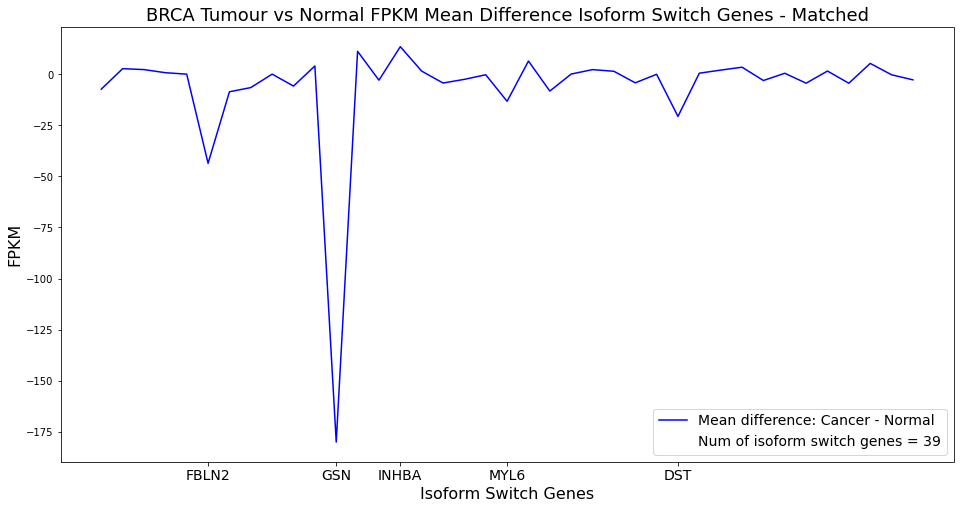

In [18]:
#Plot for mean FPKM difference between tumour and normal samples for isoforms

ax = mean_dif_iso.plot(label='Mean difference: Cancer - Normal',color='blue',figsize=(16,8))

ax.plot([], [], ' ',label= 'Num of cis eQTL = ' + str(len(mean_dif_iso)))

ax.legend(['Mean difference: Cancer - Normal','Num of isoform switch genes = ' + str(len(mean_dif_iso))],fontsize=14)
ax.set_xlabel('Isoform Switch Genes',fontsize=16)
ax.set_xticks(xticks)
ax.set_xticklabels(top_gene_df.index,fontsize=14)
ax.set_ylabel('FPKM',fontsize=16)
ax.set_title(FPKM_isoform_filtered_file.split('/')[5] + ' Tumour vs Normal FPKM Mean Difference Isoform Switch Genes - Matched',fontsize=18)

ax.figure.savefig(FPKM_isoform_filtered_file.split('/')[5]+ '_Tumour_vs_Normal_FPKM_Mean_Difference_Isoform_Switch_Genes_Matched.png')